In [1]:
#https://theanalyst.com/eu/2021/11/what-is-match-momentum/
#https://twitter.com/LanusStats/status/1641121400189599746

import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
sb.competitions().head()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-07-25T10:28:52.038697,None,None,2023-07-25T10:28:52.038697
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
world_cup = sb.matches(competition_id=43, season_id=106)
world_cup[world_cup['competition_stage'] == 'Final']

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,available,2023-02-20T07:27:19.374380,2023-06-20T16:17:52.880018,7,Final,Lusail Stadium,Szymon Marciniak,1.1.0,2,2


In [4]:
world_cup_final = sb.events(match_id=3869685)
world_cup_final.columns

credentials were not supplied. open data access only


Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [5]:
world_cup_final.type.value_counts()

Pass               1263
Ball Receipt*      1114
Carry               940
Pressure            361
Ball Recovery       115
Duel                 98
Dribble              54
Block                50
Foul Committed       48
Clearance            45
Goal Keeper          44
Foul Won             44
Shot                 38
Miscontrol           35
Dispossessed         34
Dribbled Past        31
Interception         28
Substitution         13
Half End             10
Half Start           10
Injury Stoppage       9
50/50                 8
Tactical Shift        7
Starting XI           2
Bad Behaviour         2
Shield                1
Offside               1
Player On             1
Player Off            1
Name: type, dtype: int64

In [6]:
dfxT_world_cup_final = world_cup_final[world_cup_final['type'].isin(['Pass', 'Carry'])].reset_index(drop=True)[['id', 'minute', 'player', 'team', 'type','location', 'pass_end_location', 'pass_outcome','carry_end_location']]
dfxT_world_cup_final.head(3)

,id,minute,player,team,type,location,pass_end_location,pass_outcome,carry_end_location
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,0,Antoine Griezmann,France,Pass,"[61.0, 40.1]","[48.0, 43.2]",NaN,NaN
1,a5956ecc-d637-44d2-8705-e2079e12013e,0,Aurélien Djani Tchouaméni,France,Pass,"[49.7, 43.6]","[96.0, 1.8]",Out,NaN
2,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,0,Nahuel Molina Lucero,Argentina,Pass,"[22.7, 80.0]","[36.0, 75.2]",NaN,NaN


In [7]:
dfxT_world_cup_final[['x', 'y']] = dfxT_world_cup_final['location'].apply(lambda x: pd.Series(x))
dfxT_world_cup_final[['Pass_end_x', 'Pass_end_y']] = dfxT_world_cup_final['pass_end_location'].apply(lambda x: pd.Series(x))
dfxT_world_cup_final[['Carry_end_x', 'Carry_end_y']] = dfxT_world_cup_final['carry_end_location'].apply(lambda x: pd.Series(x))
dfxT_world_cup_final.head(3)

,id,minute,player,team,type,location,pass_end_location,pass_outcome,carry_end_location,x,y,Pass_end_x,Pass_end_y,Carry_end_x,Carry_end_y
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,0,Antoine Griezmann,France,Pass,"[61.0, 40.1]","[48.0, 43.2]",NaN,NaN,61.0,40.1,48.0,43.2,NaN,NaN
1,a5956ecc-d637-44d2-8705-e2079e12013e,0,Aurélien Djani Tchouaméni,France,Pass,"[49.7, 43.6]","[96.0, 1.8]",Out,NaN,49.7,43.6,96.0,1.8,NaN,NaN
2,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,0,Nahuel Molina Lucero,Argentina,Pass,"[22.7, 80.0]","[36.0, 75.2]",NaN,NaN,22.7,80.0,36.0,75.2,NaN,NaN


In [7]:
def xT(df, type):
    xT = pd.read_json("xTGrid.json")
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape
    if type not in ['Pass', 'Carry']:
        raise ValueError("El parámetro type solo acepta 'Pass' o 'Carry'")
    
    df_xT = df[df['type'] == f'{type}']
    df_xT = df_xT.dropna(subset=['x', 'y', f'{type}_end_x', f'{type}_end_y'])

    df_xT['x1_bin'] = pd.cut(df_xT['x'], bins=xT_cols, labels=False)
    df_xT['y1_bin'] = pd.cut(df_xT['y'], bins=xT_rows, labels=False)

    df_xT['x2_bin'] = pd.cut(df_xT[f'{type}_end_x'], bins=xT_cols, labels=False)
    df_xT['y2_bin'] = pd.cut(df_xT[f'{type}_end_y'], bins=xT_rows, labels=False)

    if type == 'Pass':
        df_xT = df_xT.loc[(df_xT['pass_outcome'].isna())]

    df_xT['x1_bin'] = df_xT['x1_bin'].astype(int)
    df_xT['y1_bin'] = df_xT['y1_bin'].astype(int)
    df_xT['x2_bin'] = df_xT['x2_bin'].astype(int)
    df_xT['y2_bin'] = df_xT['y2_bin'].astype(int)
    
    df_xT['start_zone_value'] = df_xT[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['end_zone_value'] = df_xT[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['xT'] = df_xT['end_zone_value'] - df_xT['start_zone_value']
    df_xT = df_xT[['player', 'team', 'minute','type', 'x', 'y', f'{type}_end_x', f'{type}_end_y', 'xT']]
    return df_xT 

In [56]:
df1 = xT(dfxT_world_cup_final, type='Carry')
df2 = xT(dfxT_world_cup_final, type='Pass')
pd.concat([df1,df2]).groupby('player').sum()['xT'].sort_values(ascending=False)

player
Lionel Andrés Messi Cuccittini     0.494236
Alexis Mac Allister                0.295151
Gonzalo Ariel Montiel              0.236294
Antoine Griezmann                  0.232130
Kylian Mbappé Lottin               0.205032
Randal Kolo Muani                  0.175985
Ángel Fabián Di María Hernández    0.117958
Rodrigo Javier De Paul             0.115229
Marcus Thuram                      0.108929
Marcos Javier Acuña                0.096828
Jules Koundé                       0.086699
Ibrahima Konaté                    0.081691
Enzo Fernandez                     0.055733
Dayotchanculle Upamecano           0.052431
Cristian Gabriel Romero            0.048875
Nicolás Alejandro Tagliafico       0.047945
Nahuel Molina Lucero               0.043389
Aurélien Djani Tchouaméni          0.042755
Nicolás Hernán Otamendi            0.040035
Raphaël Varane                     0.038061
Adrien Rabiot                      0.034067
Hugo Lloris                        0.033167
Leandro Daniel Paredes   

In [8]:
def concatenar_xTdfs(df):
    df_concat_xT = pd.DataFrame()
    types = ['Pass', 'Carry']
    for i in types:
        df_xT = xT(df, type=i)
        df_concat_xT = df_concat_xT.append(df_xT)
    return df_concat_xT

In [9]:
def limpiar_df(partido_entero):
    df_limpio = partido_entero[partido_entero['type'].isin(['Pass', 'Carry'])].reset_index(drop=True)[['id', 'minute', 'player', 'team', 'type','location', 'pass_end_location', 'pass_outcome','carry_end_location']]
    df_limpio[['x', 'y']] = df_limpio['location'].apply(lambda x: pd.Series(x))
    df_limpio[['Pass_end_x', 'Pass_end_y']] = df_limpio['pass_end_location'].apply(lambda x: pd.Series(x))
    df_limpio[['Carry_end_x', 'Carry_end_y']] = df_limpio['carry_end_location'].apply(lambda x: pd.Series(x))
    return df_limpio

In [10]:
df = limpiar_df(sb.events(match_id=3869685))
df_total = concatenar_xTdfs(df)
df_total

credentials were not supplied. open data access only


,player,team,minute,type,x,y,Pass_end_x,Pass_end_y,xT,Carry_end_x,Carry_end_y
0,Antoine Griezmann,France,0,Pass,61.0,40.1,48.0,43.2,-0.002815,NaN,NaN
2,Nahuel Molina Lucero,Argentina,0,Pass,22.7,80.0,36.0,75.2,0.000543,NaN,NaN
3,Rodrigo Javier De Paul,Argentina,0,Pass,41.1,73.9,23.2,62.8,-0.000015,NaN,NaN
4,Cristian Gabriel Romero,Argentina,0,Pass,24.7,59.4,21.5,32.2,0.000055,NaN,NaN
5,Nicolás Hernán Otamendi,Argentina,0,Pass,24.0,27.1,21.7,49.3,0.000054,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2198,Enzo Fernandez,Argentina,123,Carry,56.1,22.0,NaN,NaN,0.000000,56.1,22.2
2199,Aurélien Djani Tchouaméni,France,123,Carry,61.0,55.8,NaN,NaN,-0.000097,63.4,36.1
2200,Kylian Mbappé Lottin,France,123,Carry,115.8,8.5,NaN,NaN,-0.006666,113.9,14.1
2201,Kylian Mbappé Lottin,France,123,Carry,113.9,14.1,NaN,NaN,0.000000,114.5,19.0


In [14]:
xT_local = df_total[df_total['team'] == 'Argentina'].groupby('minute').sum()
xT_visit = df_total[df_total['team'] != 'Argentina'].groupby('minute').sum()


In [18]:
xT_local.head()

,x,y,Pass_end_x,Pass_end_y,xT,Carry_end_x,Carry_end_y
minute,,,,,,,
0,384.1,571.3,198.6,254.1,0.000635,202.1,242.5
1,289.4,352.4,126.9,187.6,0.002349,121.4,198.6
2,894.2,376.3,460.4,160.9,0.065741,481.7,204.9
3,799.6,658.5,439.5,308.3,-0.000414,363.0,339.7
4,1168.2,263.0,540.5,119.7,0.017919,622.0,145.2


In [37]:
xT_local['rolling_xT'] = xT_local['xT'].rolling(5).mean()
xT_visit['rolling_xT'] = xT_visit['xT'].rolling(5).mean()

In [38]:
xT_tot = xT_local.merge(xT_visit, left_index=True, right_index=True, how='outer', suffixes=['_local', '_visit'])[['rolling_xT_local', 'rolling_xT_visit']].fillna(0)

In [39]:
xT_tot['dif_tot'] = xT_tot['rolling_xT_local'] - xT_tot['rolling_xT_visit']

In [40]:
xT_tot.tail(15)

,rolling_xT_local,rolling_xT_visit,dif_tot
minute,,,
105,0.136403,0.029095,0.107308
106,0.156731,0.006982,0.149749
107,0.202482,0.011149,0.191334
109,0.000000,0.000809,-0.000809
110,0.000000,0.003214,-0.003214
111,0.208718,-0.001108,0.209826
112,0.124974,0.000000,0.124974
113,0.074389,-0.002194,0.076583
114,0.000000,0.017471,-0.017471


Text(0.5, 1.0, 'Match momentum entre Argentina vs. Francia. Final del Mundial Qatar 2022')

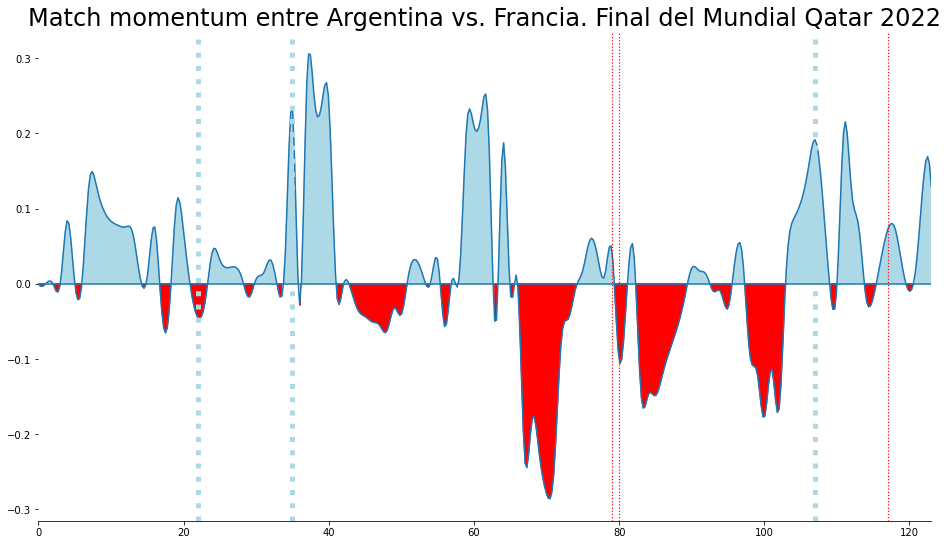

In [61]:
fig = plt.figure(figsize=(16,9))

color_local = 'lightblue'
color_visitante = 'red'

x = xT_tot.index
y = xT_tot.dif_tot

X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.axhline(0)

plt.fill_between(X_, Y_, color=color_local, where= Y_ > 0)
plt.fill_between(X_, Y_, color=color_visitante, where= Y_ < 0)

df_goles = world_cup_final[(world_cup_final.shot_outcome == 'Goal') & (world_cup_final['minute'] < 120)]
goles = df_goles.minute.values
id_goles = df_goles.team.values

for i in range(len(goles)):
    if id_goles[i] == 'Argentina':
        plt.axvline(goles[i], lw=5, color=color_local, ls=':')
    else:
        plt.axvline(goles[i], lw=1.2, color=color_visitante, ls=':')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(colors='black', axis='x')

plt.xlim(0,xT_tot.index[-1])

plt.title('Match momentum entre Argentina vs. Francia. Final del Mundial Qatar 2022', fontsize=24)

In [54]:
df_goles = world_cup_final[(world_cup_final.shot_outcome == 'Goal') & (world_cup_final['minute'] < 120)]
goles = df_goles.minute.values
id_goles = df_goles.team.values
goles, id_goles

(array([ 22,  35,  79,  80, 107, 117], dtype=int64),
 array(['Argentina', 'Argentina', 'France', 'France', 'Argentina',
        'France'], dtype=object))